In [1]:
from PIL import Image
import torch
from tqdm.auto import tqdm

from point_e.diffusion.configs import DIFFUSION_CONFIGS, diffusion_from_config
from point_e.diffusion.sampler import PointCloudSampler
from point_e.models.download import load_checkpoint
from point_e.models.configs import MODEL_CONFIGS, model_from_config
from point_e.util.plotting import plot_point_cloud

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

print('creating base model...')
# base_name = 'base40M' # use base300M or base1B for better results
base_name = 'base1B' # use base300M or base1B for better results

base_model = model_from_config(MODEL_CONFIGS[base_name], device)
base_model.eval()
base_diffusion = diffusion_from_config(DIFFUSION_CONFIGS[base_name])

print('creating upsample model...')
upsampler_model = model_from_config(MODEL_CONFIGS['upsample'], device)
upsampler_model.eval()
upsampler_diffusion = diffusion_from_config(DIFFUSION_CONFIGS['upsample'])

print('downloading base checkpoint...')
base_model.load_state_dict(load_checkpoint(base_name, device))

print('downloading upsampler checkpoint...')
upsampler_model.load_state_dict(load_checkpoint('upsample', device))

creating base model...
creating upsample model...
downloading base checkpoint...
downloading upsampler checkpoint...


<All keys matched successfully>

In [3]:
sampler = PointCloudSampler(
    device=device,
    models=[base_model, upsampler_model],
    diffusions=[base_diffusion, upsampler_diffusion],
    num_points=[1024, 4096 - 1024],
    aux_channels=['R', 'G', 'B'],
    guidance_scale=[3.0, 3.0],
)

In [4]:
# Load an image to condition on.
img = Image.open('/data/abrar/3dgrounding/snare/data/screenshots/1a6a520652aa2244146fa8a09fad6c38/1a6a520652aa2244146fa8a09fad6c38-11.png')

imgs = [img for i in range(4)]

# Produce a sample from the model.
samples = None
for x in tqdm(sampler.sample_batch_progressive(batch_size=len(imgs), model_kwargs=dict(images=imgs))):
    samples = x
    

0it [00:00, ?it/s]

In [12]:
sampler.output_to_point_clouds(samples)[0]

PointCloud(coords=array([[ 0.35045952,  0.05399281,  0.15198544],
       [ 0.3825685 ,  0.27080756, -0.5       ],
       [ 0.3778406 , -0.04201504,  0.24441679],
       ...,
       [ 0.47898635,  0.06473684, -0.461798  ],
       [-0.1785434 ,  0.31666103, -0.39307356],
       [-0.01306165, -0.16230193,  0.3423164 ]], dtype=float32), channels={'R': array([0.8078432 , 1.        , 1.        , ..., 1.        , 1.        ,
       0.34901962], dtype=float32), 'G': array([0.8078432, 1.       , 1.       , ..., 1.       , 1.       ,
       1.       ], dtype=float32), 'B': array([0.8078432 , 1.        , 1.        , ..., 1.        , 1.        ,
       0.03137255], dtype=float32)})

0it [00:00, ?it/s]

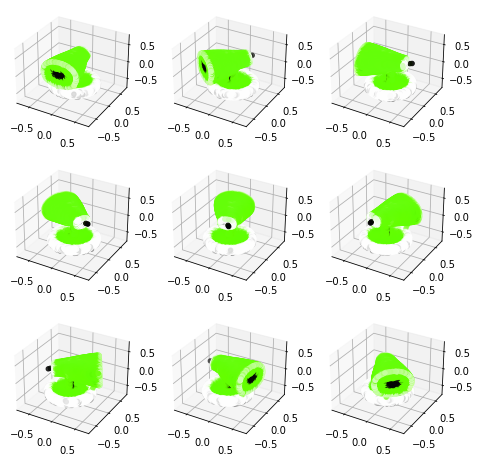

In [4]:
# Load an image to condition on.
img = Image.open('/data/abrar/3dgrounding/snare/data/screenshots/1a6a520652aa2244146fa8a09fad6c38/1a6a520652aa2244146fa8a09fad6c38-11.png')

imgs = [

# Produce a sample from the model.
samples = None
for x in tqdm(sampler.sample_batch_progressive(batch_size=1, model_kwargs=dict(images=[img]))):
    samples = x
    
pc = sampler.output_to_point_clouds(samples)[0]
fig = plot_point_cloud(pc, grid_size=3, fixed_bounds=((-0.75, -0.75, -0.75),(0.75, 0.75, 0.75)))

In [5]:
pc.__dict__.keys()

dict_keys(['coords', 'channels'])

In [8]:
coords = pc.coords

In [10]:
R = pc.channels['R']
G = pc.channels['G']
B = pc.channels['B']

In [13]:
import numpy as np

In [18]:
rgb = np.stack([R,G,B])

In [20]:
import open3d as o3d

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [31]:
from open3d.web_visualizer import draw

[Open3D INFO] Resetting default logger to print to terminal.


In [27]:
cloud = o3d.geometry.PointCloud(o3d.utility.Vector3dVector(coords))

In [38]:
cloud.colors = o3d.utility.Vector3dVector(rgb.T)

In [39]:
draw(cloud)

WebVisualizer(window_uid='window_1')

0it [00:00, ?it/s]

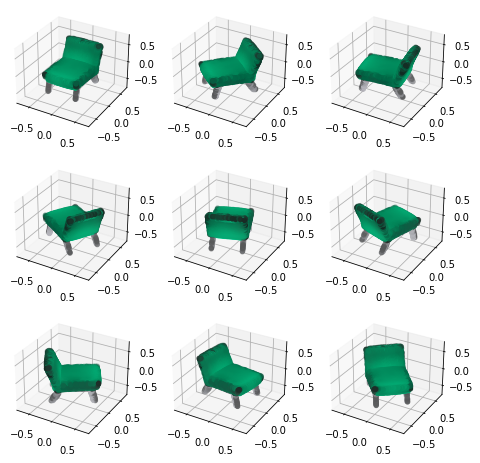

In [11]:
# Load an image to condition on.
img = Image.open('/data/abrar/3dgrounding/snare/data/screenshots/1bb2b8d52e3ade042b114cb28ee9f2b7/1bb2b8d52e3ade042b114cb28ee9f2b7-10.png')

# Produce a sample from the model.
samples = None
for x in tqdm(sampler.sample_batch_progressive(batch_size=1, model_kwargs=dict(images=[img]))):
    samples = x
    
pc = sampler.output_to_point_clouds(samples)[0]
fig = plot_point_cloud(pc, grid_size=3, fixed_bounds=((-0.75, -0.75, -0.75),(0.75, 0.75, 0.75)))

In [ ]:
# Load an image to condition on.
img = Image.open('/data/abrar/3dgrounding/snare/data/screenshots/1dc7f7d076afd0ccf11c3739edd52fa3/1dc7f7d076afd0ccf11c3739edd52fa3-11.png')

# Produce a sample from the model.
samples = None
for x in tqdm(sampler.sample_batch_progressive(batch_size=1, model_kwargs=dict(images=[img]))):
    samples = x
    
pc = sampler.output_to_point_clouds(samples)[0]
fig = plot_point_cloud(pc, grid_size=3, fixed_bounds=((-0.75, -0.75, -0.75),(0.75, 0.75, 0.75)))

0it [00:00, ?it/s]

In [ ]:
# Load an image to condition on.
img = Image.open('/data/abrar/3dgrounding/snare/data/screenshots/1bb2b8d52e3ade042b114cb28ee9f2b7/1bb2b8d52e3ade042b114cb28ee9f2b7-10.png')

# Produce a sample from the model.
samples = None
for x in tqdm(sampler.sample_batch_progressive(batch_size=1, model_kwargs=dict(images=[img]))):
    samples = x
    
pc = sampler.output_to_point_clouds(samples)[0]
fig = plot_point_cloud(pc, grid_size=3, fixed_bounds=((-0.75, -0.75, -0.75),(0.75, 0.75, 0.75)))

In [ ]:
# Load an image to condition on.
img = Image.open('/data/abrar/3dgrounding/snare/data/screenshots/1bb2b8d52e3ade042b114cb28ee9f2b7/1bb2b8d52e3ade042b114cb28ee9f2b7-10.png')

# Produce a sample from the model.
samples = None
for x in tqdm(sampler.sample_batch_progressive(batch_size=1, model_kwargs=dict(images=[img]))):
    samples = x
    
pc = sampler.output_to_point_clouds(samples)[0]
fig = plot_point_cloud(pc, grid_size=3, fixed_bounds=((-0.75, -0.75, -0.75),(0.75, 0.75, 0.75)))